In [27]:
import numpy as np
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
plt.rcParams.update({"figure.dpi": 150})

In [28]:
#kernel functions

def Sobolev1_fun(t):
    return 1 + (t**2)*np.pi**2 - np.pi**2*t + (np.pi**2)/6

def Sobolev1_fun_periodic(t):
    return np.where(t<=0, Sobolev1_fun(t+1), Sobolev1_fun(t))

def Sobolev_with_sum(t,p):
    sum = 0
    for k in range(-p,p):
        if k==0:
            sum += 1 *np.exp(1j*k*2*np.pi*t)
        else:
            sum += .5* k**(-2) *np.exp(1j*k*2*np.pi*t)
    return sum


def periodic(t,s,sigma=1,ell=1):
    return sigma**2 * np.exp( -2*(np.sin(np.pi*np.abs(t-s)))**2 / ell**2 )

def periodic_fun(t,sigma=3,ell=.2):
    return sigma**2 * np.exp( -2*(np.sin(np.pi*np.abs(t)))**2 / ell**2 )


def Dirichlet2(t,p):
    return sum((np.exp(1j*2*k*np.pi*t)) for k in range(1,p+2)) + sum((np.exp(1j*2*k*np.pi*t) ) for k in range(-p,0))

def Dirichlet(t,p):
    return (2*p + 1)* ( np.sinc( (2*p + 1) * (t)  ) / np.sinc(t) )

/home/emilia/.local/miniconda3/envs/conv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/emilia/.local/miniconda3/envs/conv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


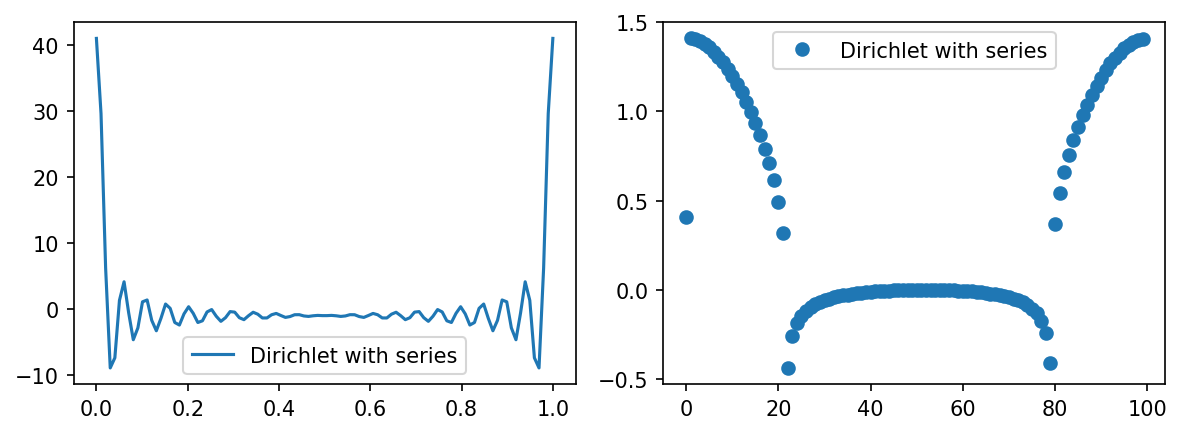

In [29]:
grid_points = 100

x =np.linspace(0,1,grid_points)

p=20

# dirichlet = Dirichlet(x,p)
# dirichlet[0] = 2*p + 1
# dirichlet[1] = 2*p + 1
# dirichlet[-1] = 2*p + 1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
# ax1.plot(x, dirichlet, label="Dirichlet with sinc")
ax1.plot(x, Dirichlet2(x,p), label="Dirichlet with series")
ax1.legend()
# ax2.plot(np.fft.fft(dirichlet)/len(x), 'o', label="Dirichlet with sinc")
ax2.plot(np.fft.fft(Dirichlet2(x,p))/len(x), 'o', label="Dirichlet with series")
ax2.legend()
plt.tight_layout()


/home/emilia/.local/miniconda3/envs/conv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/emilia/.local/miniconda3/envs/conv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


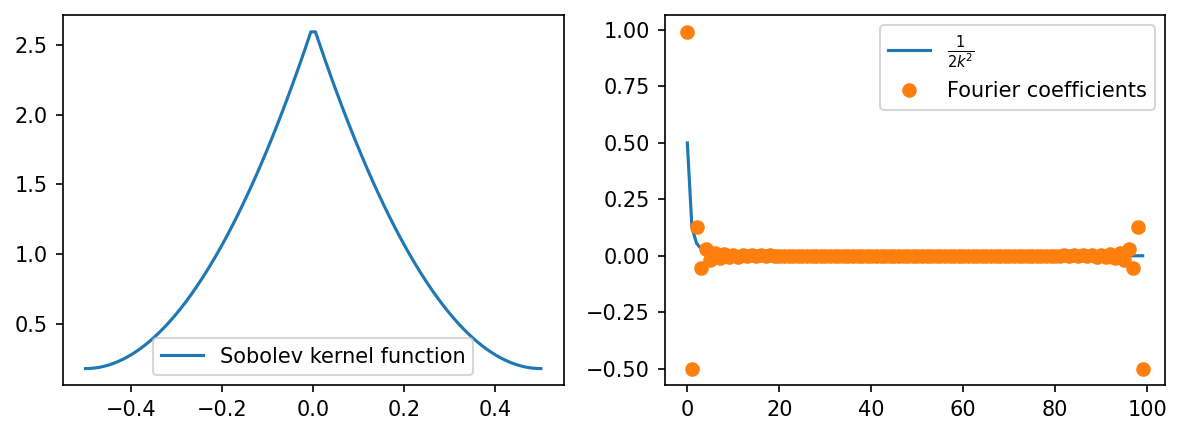

In [30]:
#Sobolev periodic kernel
x =np.linspace(-.5,.5,grid_points)

sobolev_coeff = np.fft.fft(Sobolev1_fun_periodic(x))/len(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(x, Sobolev1_fun_periodic(x), label="Sobolev kernel function")
ax1.legend()
aux_vec=np.arange(1,sobolev_coeff.size+1, dtype=float)
ax2.plot(aux_vec**(-2)/2, label=r'$\frac{1}{2k^{2}}$')
ax2.plot(sobolev_coeff, 'o', label="Fourier coefficients")
ax2.legend()
plt.tight_layout()


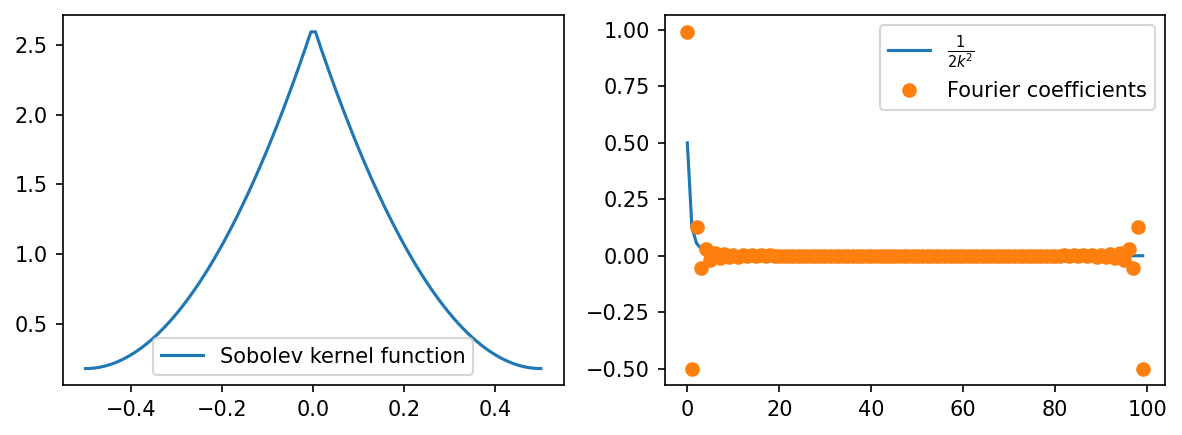

In [31]:
#Sobolev periodic kernel computed with the Fourier series 

p=100
sobolev_sum_coeff = np.fft.fft(Sobolev_with_sum(x,p))/len(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(x, Sobolev_with_sum(x,p), label="Sobolev kernel function")
ax1.legend()
aux_vec=np.arange(1,sobolev_sum_coeff.size+1, dtype=float)
ax2.plot(aux_vec**(-2)/2, label=r'$\frac{1}{2k^{2}}$')
ax2.plot(sobolev_sum_coeff, 'o', label="Fourier coefficients")
ax2.legend()
plt.tight_layout()

(18,)


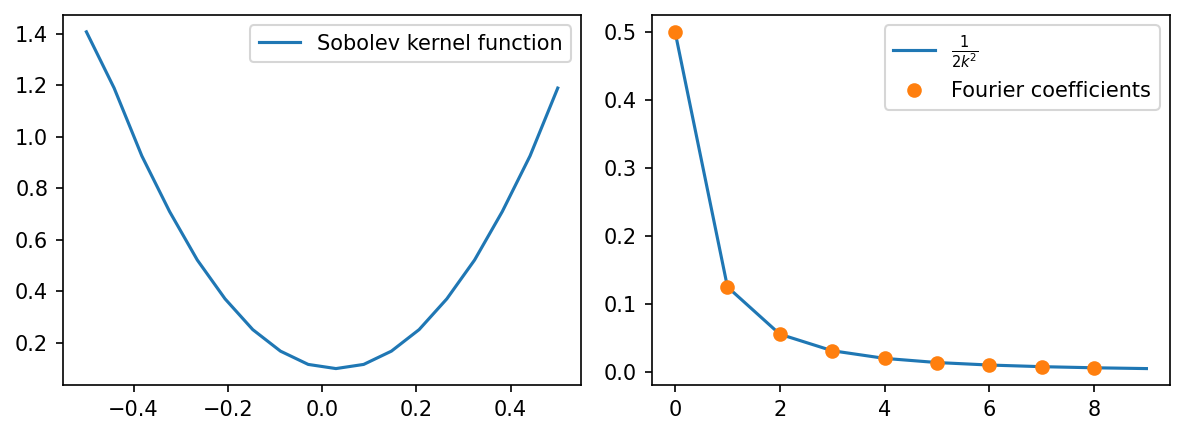

In [32]:
#Now the opposite: choose the Fourier coefficients of the kernel and  plot it in time space with ifft

n_coeff = 10
t = np.linspace(-.5,.5,2*(n_coeff-1))

#compute the coefficients
sobolev_ker_coeff = np.zeros(n_coeff, dtype=complex)
sobolev_ker_coeff[0] = 1
for k in range(1,n_coeff):
    sobolev_ker_coeff[k] = .5* k**(-2) 

#compute the kernel in time space
sobolev_ker = np.fft.irfft(sobolev_ker_coeff*len(sobolev_ker_coeff))
print(sobolev_ker.shape)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(t, sobolev_ker, label="Sobolev kernel function")
ax1.legend()
aux_vec=np.arange(1,sobolev_ker_coeff.size+1, dtype=float)
ax2.plot(aux_vec[:10]**(-2)/2, label=r'$\frac{1}{2k^{2}}$')
ax2.plot(sobolev_ker_coeff[1:], 'o', label="Fourier coefficients")
ax2.legend()
plt.tight_layout()
#  the kernel in time space  is shifted! not symmetric in 0. why???

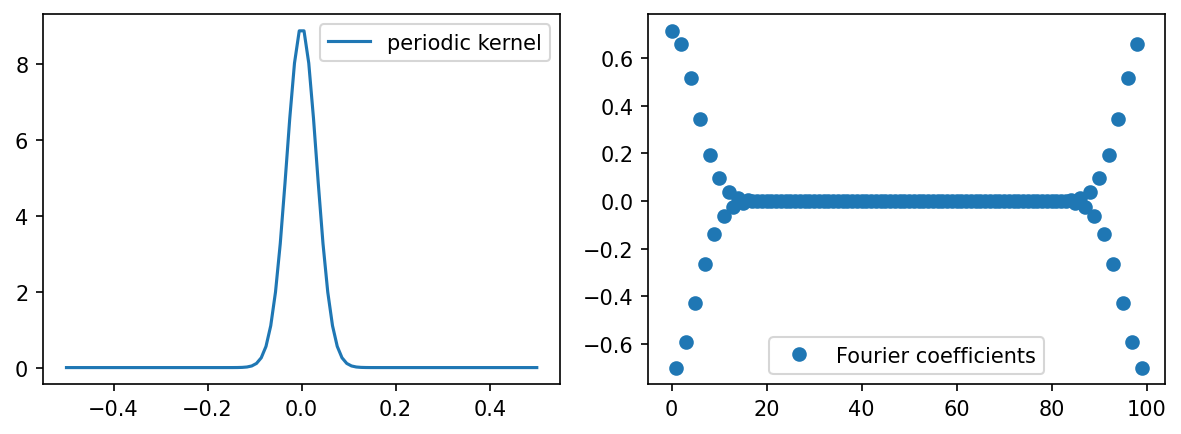

In [8]:
# periodic kernel 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(x, periodic_fun(x), label="periodic kernel")
ax1.legend()
ax2.plot(np.fft.fft(periodic_fun(x))/len(x), 'o', label="Fourier coefficients")
ax2.legend()
plt.tight_layout()



/tmp/ipykernel_4274/1818171694.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [[np.float64(f(a[i], b[j])) for j in range(b.size)]


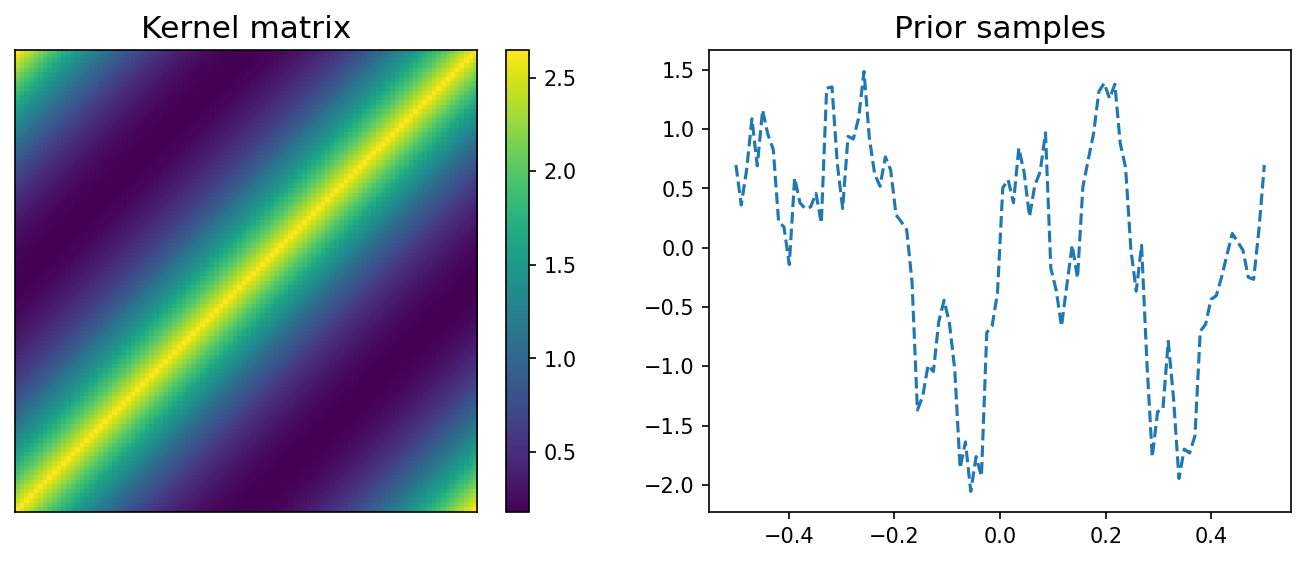

In [33]:
# GP samples from a kernel 

def mean_fun(x):
    return 0.0 * x  # mean function

def kernel_fun(f):
    return lambda a, b: np.array(
        [[np.float64(f(a[i], b[j])) for j in range(b.size)]
         for i in range(a.size)]
    )


sig = 1
ell = 1


# k = kernel_fun(lambda a, b: periodic(a,b,sig,ell))
k = kernel_fun(lambda a, b: Sobolev1_fun(np.abs(a-b)))

k0 = k(x[:,None], x[:,None])

m = np.zeros((len(x),))

samples = multivariate_normal(m, k0, size=1).T
fig, axs = plt.subplots(1, 2, figsize=(11, 4))

ax0 = axs[0].imshow(
    k0,
    origin = 'lower'
)

axs[1].plot(x, samples, '--')
axs[0].set_title('Kernel matrix', fontsize = 15)
axs[1].set_title('Prior samples', fontsize = 15)
axs[0].set_xticks([])
axs[0].set_yticks([])
fig.colorbar(ax0, ax = axs[0])

In [12]:
# #function that draws samples from a GP with kernel kernel_fun
# def GP_sample(kernel_fun, x, n_samples = 1):
#     k = kernel_fun(x[:,None], x[:,None])
#     m = np.zeros((len(x),))
#     samples = multivariate_normal(m, k, size=n_samples).T
#     return samples

# GP_samples = GP_sample(k, x, n_samples = 1)


# #plot the samples
# plt.figure()
# plt.plot(x, GP_samples)
# plt.title('Samples from a GP with periodic kernel')
# plt.show()


In [34]:
# choose a kernel with a certain decay of the Fourier coefficients and implement the Fourier series

def my_kernel_fun(t,gamma,M):
    sum = 0
    for k in range(0,M):
        if k==0:
            sum += 1 *np.exp(1j*k*2*np.pi*t)
        else:
            sum +=  (1/np.abs(k)**(gamma)) *np.exp(1j*k*2*np.pi*t)
    return sum

def my_kernel_fun_periodic(t,gamma,M):
    return np.where(t<=0, my_kernel_fun(t+1,gamma,M), my_kernel_fun(t,gamma,M))


/home/emilia/.local/miniconda3/envs/conv/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/emilia/.local/miniconda3/envs/conv/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_4274/224616066.py:21: RuntimeWarning: divide by zero encountered in reciprocal
  ax2.plot(aux_vec**(-gamma), label=r'$\frac{1}{k^{\gamma}}$')


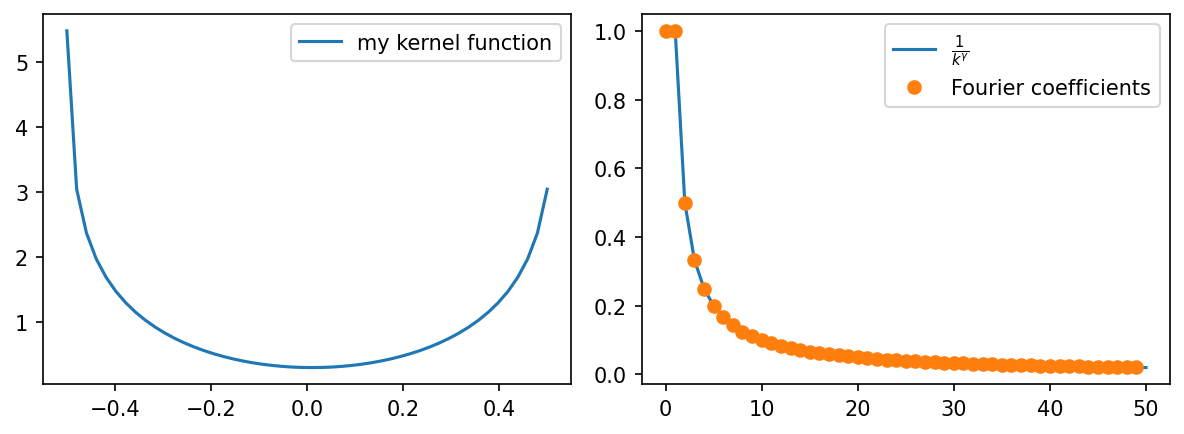

In [36]:
gamma = 1

n_coeff = 50
t = np.linspace(-.5,.5, n_coeff, dtype=float)
my_ker_coeff = np.zeros(n_coeff, dtype=float)
my_ker_coeff[0] = 1
for k in range(1,n_coeff):
    my_ker_coeff[k] =  k**(-gamma) 
# my_ker_coeff[n_coeff//2+1:] = np.flip(my_ker_coeff[1:n_coeff//2])

#swap the positive and negative frequencies
# my_ker_coeff = np.fft.fftshift(my_ker_coeff)

my_ker = np.fft.ifft(my_ker_coeff*len(my_ker_coeff))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(t,my_ker, label="my kernel function")
ax1.legend()

aux_vec=np.arange(0,my_ker_coeff.size+1, dtype=float)
ax2.plot(aux_vec**(-gamma), label=r'$\frac{1}{k^{\gamma}}$')
ax2.plot(my_ker_coeff, 'o', label="Fourier coefficients")
ax2.legend()
plt.tight_layout()

# shifted!!!!!

In [ ]:
my_ker_coeff

array([1.        , 1.        , 0.4665165 , 0.29865282, 0.21763764,
       0.17026798, 0.21763764, 0.29865282, 0.4665165 , 1.        ])

In [16]:
grid_oints = 100
t =np.linspace(-.5,.5,grid_oints)



def kernel_cosines(t,gamma,M):
    return 1 + sum((2* np.cos(2*k*np.pi*t) / (k**gamma)) for k in range(1,M+1)) 



gamma = 1.01   #decay
M = 20

kerfun_eval = kernel_cosines(t,gamma, M)
kerfun_coeff = np.fft.fft(kerfun_eval)/len(kerfun_eval)

/tmp/ipykernel_4274/1607050860.py:5: RuntimeWarning: divide by zero encountered in power
  ax2.plot(aux_vec[:M]**(-gamma), label=r'$\frac{1}{k^{\gamma}}$')


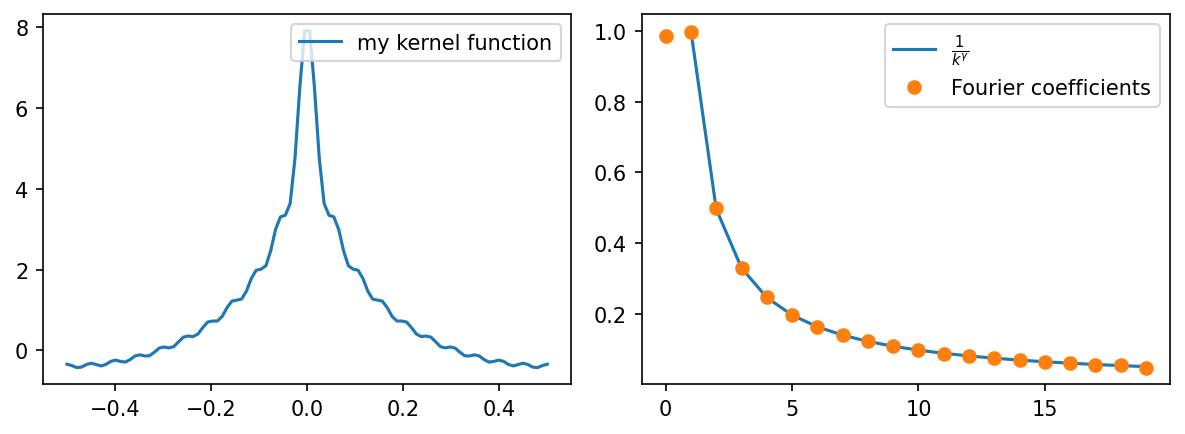

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.plot(t, kerfun_eval, label="my kernel function")
ax1.legend()
aux_vec=np.arange(0,kerfun_coeff.size, dtype=float)
ax2.plot(aux_vec[:M]**(-gamma), label=r'$\frac{1}{k^{\gamma}}$')
ax2.plot(np.abs(kerfun_coeff[:M]), 'o', label="Fourier coefficients")
ax2.legend()
plt.tight_layout()